In [1]:

import librosa
import soundfile as sf
import librosa.display
import matplotlib.pyplot as plt
import os
from pathlib import Path
import numpy as np
DATA_FOLDER = Path('/').parent / 'network' / 'data1' / 'maloneyj'  
CHILLANTO = 'chillanto'                                    
CHILLANTO_DATA_FOLDER = DATA_FOLDER / 'dataset' / CHILLANTO

In [7]:
def specto(fname):
    x, sr = librosa.load(str(fname), dtype='float32')
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    return Xdb
    
def plot(data, figsize=(14,5)):
    plt.figure(figsize=figsize)
    librosa.display.specshow(data, sr=8000, x_axis='time', y_axis='mel')

In [3]:
folder = CHILLANTO_DATA_FOLDER / 'normal'
normal = [specto(folder / fname) for fname in os.listdir(folder)]
folder = CHILLANTO_DATA_FOLDER / 'asphyxia'
asph = [specto(folder / fname) for fname in os.listdir(folder)]

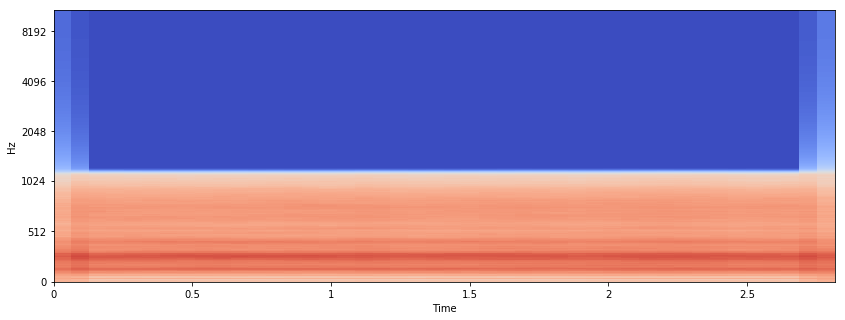

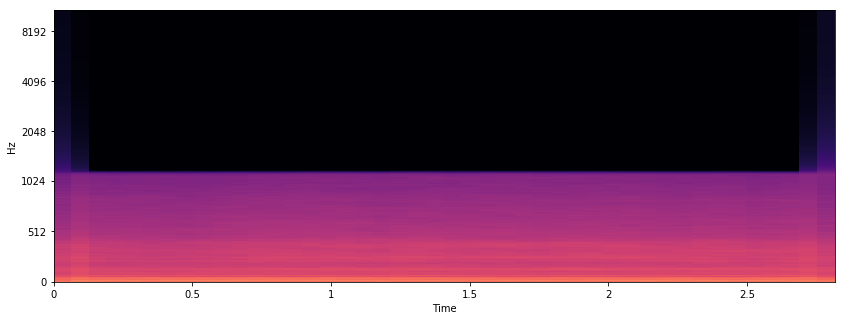

In [8]:
plot(np.mean(normal, axis=0))
plot(np.mean(asph, axis=0))

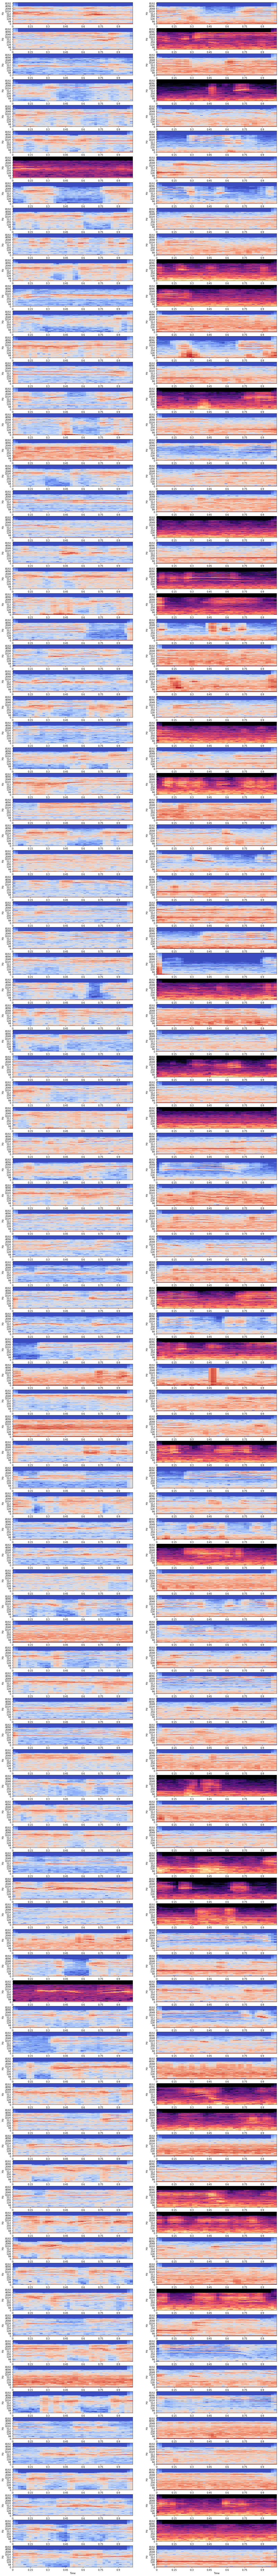

In [88]:
plt.figure(figsize=(20, 400))

for idx in range(100):
    plt.subplot(200, 2, idx * 2 + 1)
    librosa.display.specshow(normal[idx], sr=22050, x_axis='time', y_axis='log')
    plt.subplot(200, 2, idx * 2 + 2)
    librosa.display.specshow(asph[idx], sr=22050, x_axis='time', y_axis='log')


## Getting images for the paper

In [37]:
import numpy as np
import librosa
import librosa.display
from pathlib import Path
import matplotlib.pyplot as plt

def preprocess_audio(data, samp_freq, n_mels, dct_filters, frame_shift_ms, window_size_ms):
    frame_shift_in_samples = int(frame_shift_ms * samp_freq / 1000)
    window_size_in_samples = int(window_size_ms * samp_freq / 1000)

    data = librosa.feature.melspectrogram(data,
      sr=samp_freq, n_mels=n_mels, hop_length=frame_shift_in_samples, n_fft=window_size_in_samples, fmin=20, fmax=4000)
    data[data > 0] = np.log(data[data > 0])
    data = [np.matmul(dct_filters, x) for x in np.split(data, data.shape[1], axis=1)]
    data = np.array(data, order="F").squeeze(2).astype(np.float32)
    return data

In [77]:
a_file1 = Path(r"D:\Users\Charley\Desktop\chill_samples\asphyxia\0063_nohash_001030.wav")
a_file2 = Path(r"D:\Users\Charley\Desktop\chill_samples\asphyxia\0067_nohash_030030.wav")
a_file3 = Path(r"D:\Users\Charley\Desktop\chill_samples\asphyxia\0068_nohash_053030.wav")
n_file1 = Path(r"D:\Users\Charley\Desktop\chill_samples\normal\0001_nohash_001002.wav")
n_file2 = Path(r"D:\Users\Charley\Desktop\chill_samples\normal\0012_nohash_005001.wav")
n_file3 = Path(r"D:\Users\Charley\Desktop\chill_samples\normal\0015_nohash_005002.wav")
n_file4 = Path(r"D:\Users\Charley\Desktop\chill_samples\normal\0016_nohash_002001.wav")

n_dct = 40
n_mels = 40
dct_filters = librosa.filters.dct(n_dct, n_mels)
my_audio, sr = librosa.load(a_file2, sr=8000)
mfcc = preprocess_audio(my_audio, sr, n_mels, dct_filters, 10, 30)

(0, 8000)

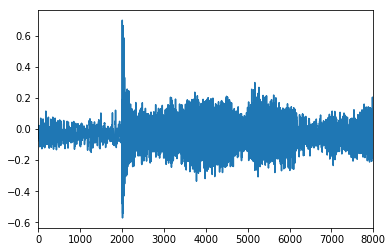

In [90]:
plt.figure()
plt.plot(my_audio)
plt.xlim([0,8000])

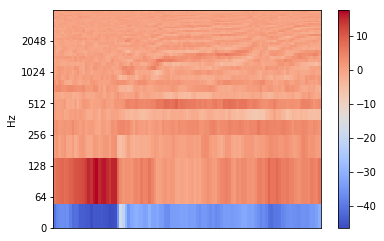

In [80]:
librosa.display.specshow(np.transpose(mfcc), y_axis='log', sr=8000, fmin=20, fmax=4000, bins_per_octave=12)
plt.colorbar()
plt.show()